#  OpenWeatherMap API

Goal - to retrieve the temperature forecasts for any city around the globe using OpenWeatherMap API


### Any city forecasts

Create a `get_forecasts` function that will take a city name as argument and return the forecast datetimes and maximum temperatures.

In [22]:
# import the libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
def get_forecasts(city_name):
  """
  Return a DataFrame containing the forecast datetimes and maximum temperatures for a specified city

  Parameters:
    city_name (str): The name of the city for which the forecast will be returned.
  """

  # call API for city info
  city_url = 'https://weather.lewagon.com/geo/1.0/direct'
  city_params = {'q': city_name}
  city_info = requests.get(city_url, city_params).json()[0]

  # check if city_name exists in city_info
  if city_name not in city_info['name']:
    return 'City is not found'

  else:
    # if the city exists, save its latitude and longitude
    coord_params = {'lat': city_info['lat'], 'lon': city_info['lon']}

    # call forecast API for this city
    forecasts_url = 'https://weather.lewagon.com/data/2.5/forecast'
    forecasts_info = requests.get(forecasts_url, coord_params).json()

    # save the datetimes and max temperatures (in Celsius) in a list
    datetimes = []
    maxtemp = []
    for key in forecasts_info['list']:
      datetimes.append(key['dt_txt'])
      maxtemp.append(key['main']['temp_max'] - 273.15)

    # create a dictionary from the list
    city_dict = {'datetime': datetimes, 'max_temperature': maxtemp}

    # return the result converted into the df
    return pd.DataFrame(city_dict)


Check the weather forecast for Amsterdam for the next 5 days

In [17]:
fcst_Amsterdam = get_forecasts('Amsterdam')
print(fcst_Amsterdam)

               datetime  max_temperature
0   2024-06-13 09:00:00            16.01
1   2024-06-13 12:00:00            16.88
2   2024-06-13 15:00:00            16.49
3   2024-06-13 18:00:00            14.82
4   2024-06-13 21:00:00            12.83
5   2024-06-14 00:00:00            12.75
6   2024-06-14 03:00:00            11.79
7   2024-06-14 06:00:00            11.73
8   2024-06-14 09:00:00            12.11
9   2024-06-14 12:00:00            15.16
10  2024-06-14 15:00:00            17.53
11  2024-06-14 18:00:00            15.60
12  2024-06-14 21:00:00            13.72
13  2024-06-15 00:00:00            12.58
14  2024-06-15 03:00:00            12.05
15  2024-06-15 06:00:00            12.40
16  2024-06-15 09:00:00            13.67
17  2024-06-15 12:00:00            17.19
18  2024-06-15 15:00:00            16.43
19  2024-06-15 18:00:00            14.25
20  2024-06-15 21:00:00            12.71
21  2024-06-16 00:00:00            12.14
22  2024-06-16 03:00:00            10.55
23  2024-06-16 0

### Visualization

Plot the temperature forecasts for various cities accross the globe.

In [28]:
cities = ["Paris", "London", "Lisbon", "Milan", "Barcelona", "Kyiv", "Amsterdam", "Vienna"]

df = pd.DataFrame()

for city in cities:

    city_df = pd.DataFrame(get_forecasts(city))
    city_df['datetime'] = pd.to_datetime(city_df['datetime'])
    city_df.set_index('datetime', inplace=True)
    city_df.columns = [city]
    df = pd.concat([df, city_df], axis=1)

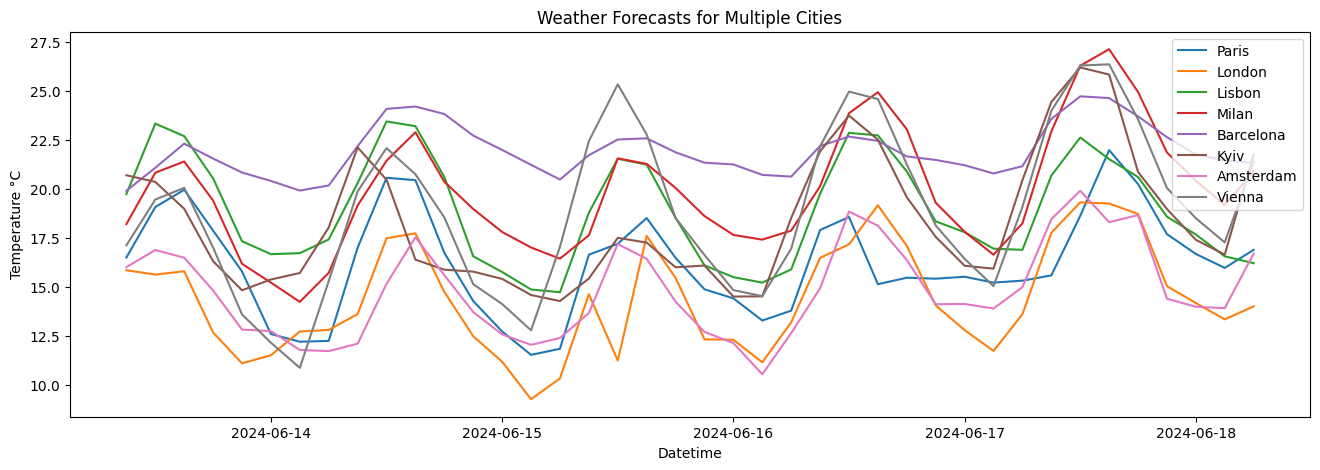

In [36]:
plt.figure(figsize=(16, 5))
plt.plot(df)
plt.xlabel('Datetime')
plt.ylabel('Temperature °C')
plt.title('Weather Forecasts for Multiple Cities')
plt.legend(cities)
plt.show()